In [1]:
%matplotlib inline

# Introduction

Topic: We will collect I-V data of a LED

# Connection

![Electrical Connections](../extra/img/fritzing/led-iv-curve_bb.png)

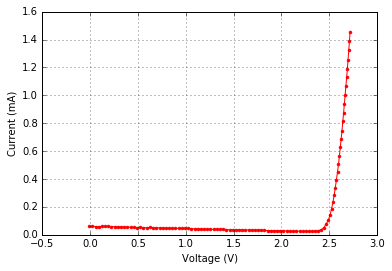

In [18]:
import box0
import numpy as np
import matplotlib.pyplot as plt

# allocate the appropriate resources
dev = box0.usb.open_supported()
ain0 = dev.ain()
aout0 = dev.aout()

# prepare AIN0
ain0.snapshot_prepare()
ain0.chan_seq_set([0, 1])
ain0.bitsize_speed_set(12, 100000)

# prepare AOUT0
aout0.snapshot_prepare()

# generate voltage, read voltage, calculate current and store the result
# AIN0.CH0 = AOUT0.CH0 = generated signal
# AIN0.CH1 = voltage across LED
# current  = (AIN0.CH0 - AIN0.CH1) / R1  (where R1 = 320)
R1 = 320.0
SAMPLES = 100
x = np.empty(SAMPLES)
y = np.empty(SAMPLES)

voltages = np.linspace(0.0, 3.3, SAMPLES)
aout0_running = False

for i in range(SAMPLES):
    if aout0_running:
        aout0.snapshot_stop()
    
    # output "v" value on AOUT0.CH0
    aout0.snapshot_start(voltages[i:(i+1)])
    aout0_running = True
    
    # read back AIN0.CH0 and AIN0.CH1
    readed_data = np.empty(SAMPLES)
    ain0.snapshot_start(readed_data)
    
    # do the calculation
    ch0 = np.mean(readed_data[0::2])
    ch1 = np.mean(readed_data[1::2]) # = voltage across LED
    current = (ch0 - ch1)/R1
    
    # store the result
    x[i] = ch1
    y[i] = current

# stop if AOUT0 running
if aout0_running:
    aout0.snapshot_stop()

# close the resources
ain0.close()
aout0.close()
dev.close()

# now, plot the data
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.grid(True)
plt.plot(x, y*1000, 'r.-')
plt.show()

TODO
- do caliberation (the graph is showing Uncaliberated Result, current decrease as voltage increase till knee point)